## Algoritmo não supervisionado - K-means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#criar dados aleatorios
dados = {
    'x': [25, 34, 27, 22, 33, 33, 31, 22, 35, 34, 67, 54, 64, 54, 57, 43, 50, 57, 43, 48, 33, 45, 39, 60, 42, 43, 51, 46],
    'y': [79, 67, 86, 78, 91, 94, 96, 73, 83, 70, 90, 82, 65, 66, 76, 78, 74, 83, 88, 90, 99, 97, 98, 83, 89, 80, 70, 75]
}

In [3]:
# cria o dataframe
df = pd.DataFrame(dados)
df.head()

,x,y
0,25,79
1,34,67
2,27,86
3,22,78
4,33,91


In [4]:
# adiciona o biblioteca para construir o algoritmo
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters = 2) # cria o objeto para o algoritmo k-means para encontrar 2 clusters
kmeans.fit(df) # splica o algortimo
centroides = kmeans.cluster_centers_ # encontra as coordenadas dos centroids
print(centroides)

[[35.11111111 85.33333333]
 [56.         76.4       ]]


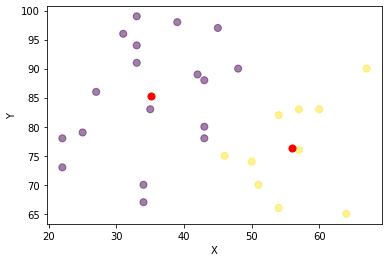

In [6]:
# realiza o plot do grafico de saida
plt.scatter(df['x'], df['y'], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
plt.scatter(centroides[:,0], centroides[:,1], c = 'red', s = 50)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Algoritmo Supervisionado - KNN

In [7]:
# importando as bibliotecas
import pylab as pl
from sklearn import neighbors, datasets
import numpy as np

In [8]:
# cria a rotina para utilizar o dataset iris
iris = datasets.load_iris()

In [9]:
# converte o dataset para dataframe
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                    columns = iris['feature_names'] + ['target'])

In [10]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
# trandformando os dados em array
x = df_iris.iloc[:, :-1].values  # dados de entrada
y = df_iris.iloc[:, 4].values    # saida do target

In [12]:
# realiza a divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [13]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) # realiza a normalização dos dados

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
# treina o modelo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5) # utiliza a construção por meio de 5 vizinhos
classifier.fit(x_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
# realiza a previsão
y_pred = classifier.predict(x_test)

In [16]:
# constroi a matrix de confusão
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00         7
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


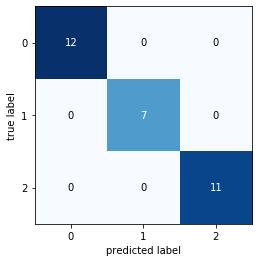

In [17]:
# realiza o plot da matrix de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

## Algoritmo Supervisionado - Arvore de Descisão

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [19]:
# cria o objeto de classificação
clf = DecisionTreeClassifier()

In [20]:
# realiza o treinamento do classificador
clf = clf.fit(x_train, y_train)

In [21]:
# realiza a previsão de classificação
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9666666666666667


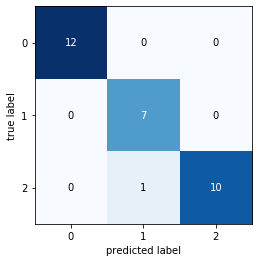

In [22]:
# avaliando o modelo
# realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

In [25]:
# visualizaação da arvore de descisão
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [28]:
# constroi a arvore de descisão para o DB Iris
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True, feature_names = iris.feature_names, class_names = ['0', '1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## Algoritmo Supervisionado - SVM

In [29]:
from sklearn.svm import SVC

In [30]:
# cria o objeto SVM
clf = SVC(gamma = 'auto')

In [31]:
# realiza a classificação via SVM
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
# realiza a previsão de classificacao
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

1.0


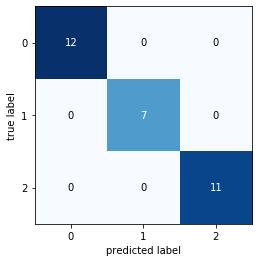

In [33]:
# avaliando o modelo
# realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

## Algoritmo - Redes Neurais

In [35]:
from sklearn.neural_network import MLPClassifier

In [51]:
# define a configuração da rede
clf = MLPClassifier(solver = 'lbfgs', alpha = 5, hidden_layer_sizes = (5, 5), random_state = 1) # rede com 2 camadas escondidas e 5 neuronios

In [52]:
# realiza o fit do modelo
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [53]:
# realiza a previsão
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9666666666666667


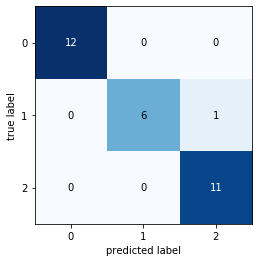

In [54]:
# avaliando o modelo
# realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()